# Regressão Logística & Métricas de Classificação
## Análise Exploratória do dataset

Nós vamos utilizar o dataset Bank Marketing disponibilizado no [site da UCI](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing). Utilizaremos uma versão adaptada para os objetivos da aula e disponível na pasta `data`.

> The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the investment product would be or not subscribed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from plotting import multiple_histograms_plot, bar_plot_with_categorical

In [2]:
sns.set_context("notebook", font_scale=1.5)

In [3]:
df = pd.read_csv('../data/bank_marketing.csv')

Segue uma descrição sucinta de cada uma das colunas do dataset:

- `duration_seconds`: last contact duration, in seconds (numeric).

- `duration_minutes`: last contact duration, in minutes (numeric).

- `duration_hours`: last contact duration, in hours (numeric).

- `emp.var.rate`: employment variation rate - quarterly indicator (numeric)

- `nr.employed`: number of employees - quarterly indicator (numeric)

- `euribor3m`: euribor 3 month rate - daily indicator (numeric)

- `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- `contact`: contact communication type (1 for cellular, 2 for telephone) 

- `loan`: has personal loan? (0 for no, 1 for yes)

- `subscribed` - has the client subscribed a term deposit? (True, False)

## Exploratory Data Analysis (EDA)

In [4]:
df.shape

(41184, 10)

In [5]:
df.dtypes

duration_seconds      int64
duration_minutes    float64
duration_hours      float64
emp.var.rate        float64
nr.employed         float64
euribor3m           float64
month                object
contact               int64
loan                  int64
subscribed             bool
dtype: object

In [6]:
df.head()

,duration_seconds,duration_minutes,duration_hours,emp.var.rate,nr.employed,euribor3m,month,contact,loan,subscribed
0,261,4.350000,0.072500,1.1,5191.0,4.857,may,1,0,False
1,149,2.483333,0.041389,1.1,5191.0,4.857,may,1,0,False
2,226,3.766667,0.062778,1.1,5191.0,4.857,may,1,0,False
3,151,2.516667,0.041944,1.1,5191.0,4.857,may,1,0,False
4,307,5.116667,0.085278,1.1,5191.0,4.857,may,1,1,False


In [7]:
null_count = df.isnull().sum().sort_values(ascending=False)
null_percentage = null_count / len(df)
pd.DataFrame(data=[null_count, null_percentage],
             index=['null_amount', 'null_ratio']).T

,null_amount,null_ratio
subscribed,0.0,0.0
loan,0.0,0.0
contact,0.0,0.0
month,0.0,0.0
euribor3m,0.0,0.0
nr.employed,0.0,0.0
emp.var.rate,0.0,0.0
duration_hours,0.0,0.0
duration_minutes,0.0,0.0
duration_seconds,0.0,0.0


In [8]:
no_duration = df['duration_seconds'] == 0
print(f'calls with no duration: {no_duration.sum()}')

calls with no duration: 0


In [9]:
subscribed_mask = df['subscribed'] == True
subscription_rate = (subscribed_mask).sum() / (subscribed_mask.sum() + (~subscribed_mask).sum())
print(f'subscription_rate: {subscription_rate}')

subscription_rate: 0.11266511266511267


### duration_seconds

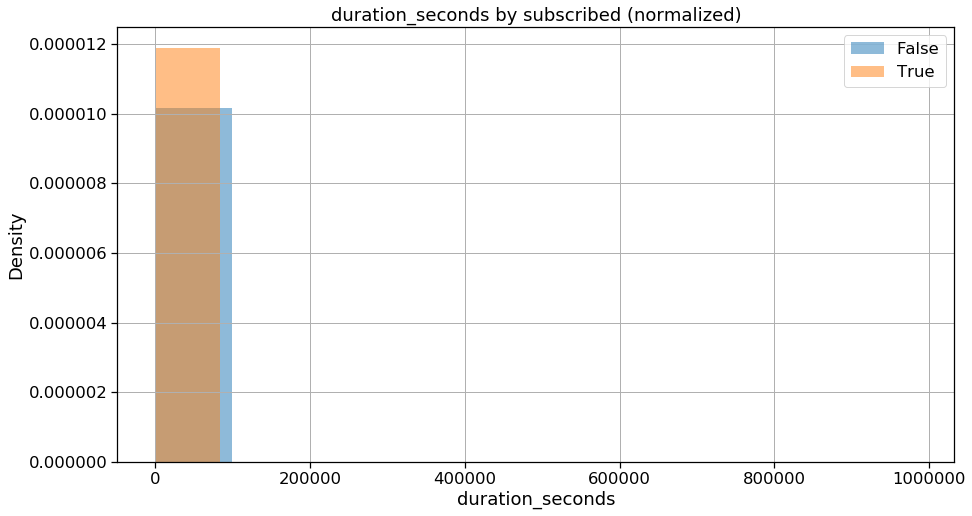

In [10]:
multiple_histograms_plot(df, x='duration_seconds', hue='subscribed', density=True)

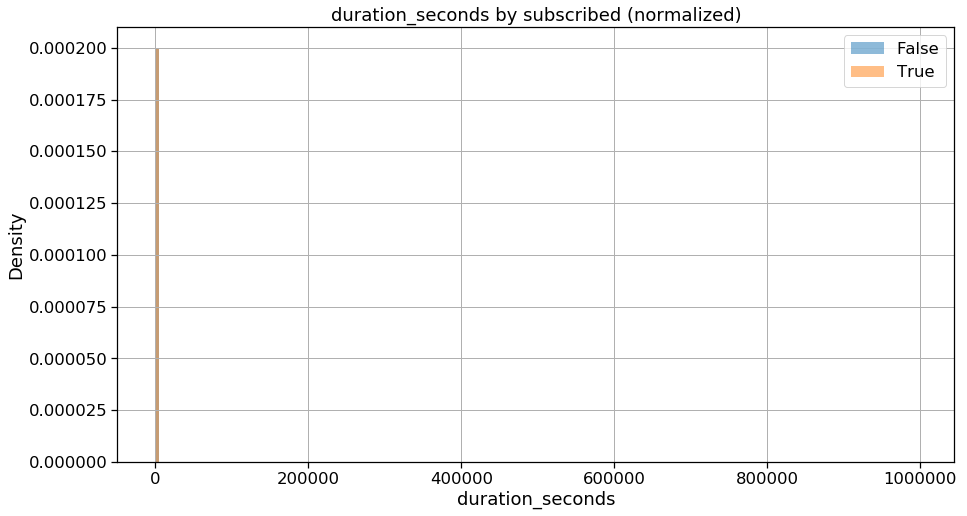

In [11]:
multiple_histograms_plot(df, x='duration_seconds', hue='subscribed',
                         bins=range(0, 1_000_000, 5_000), density=True)

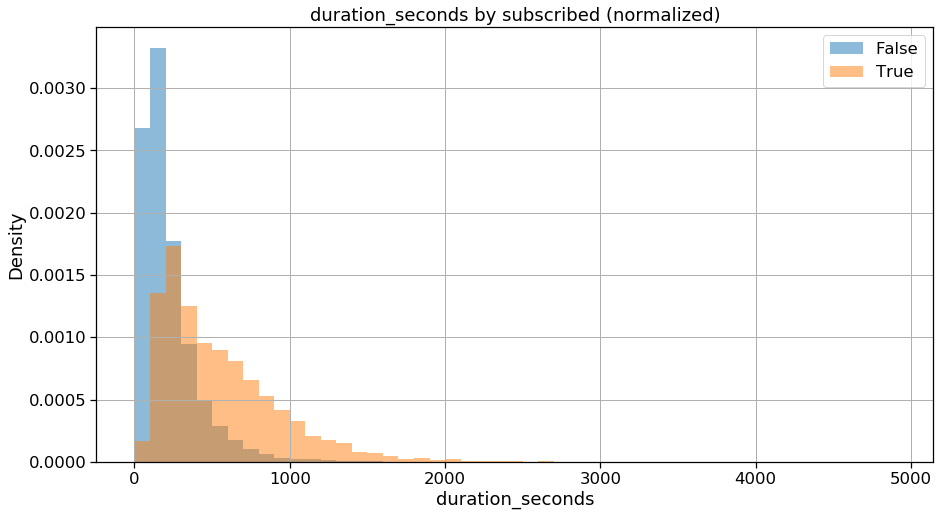

In [12]:
multiple_histograms_plot(df, x='duration_seconds', hue='subscribed',
                         bins=range(0, 5_000, 100), density=True)

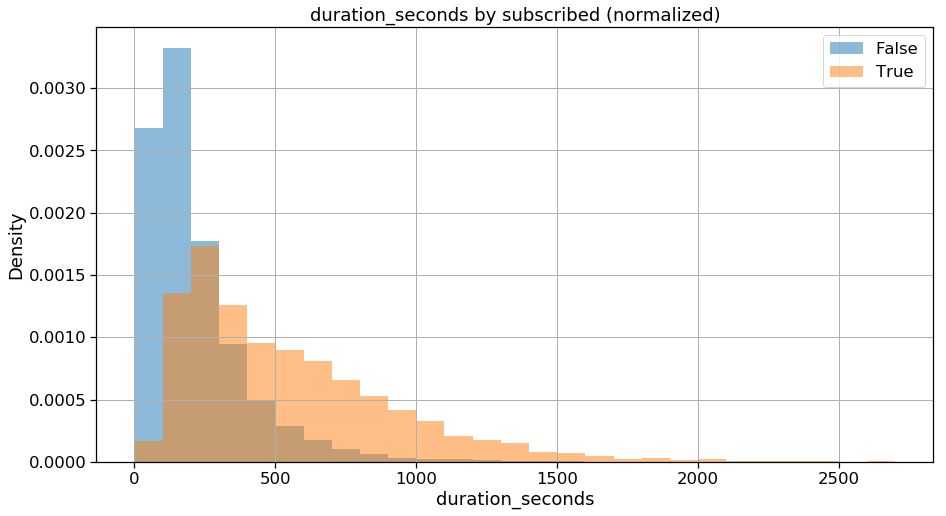

In [13]:
multiple_histograms_plot(df, x='duration_seconds', hue='subscribed',
                         bins=range(0, 2_800, 100), density=True)

In [14]:
np.log10(df['duration_seconds'].max())

5.9928185200666793

min = 6.3s
max = 1000000s


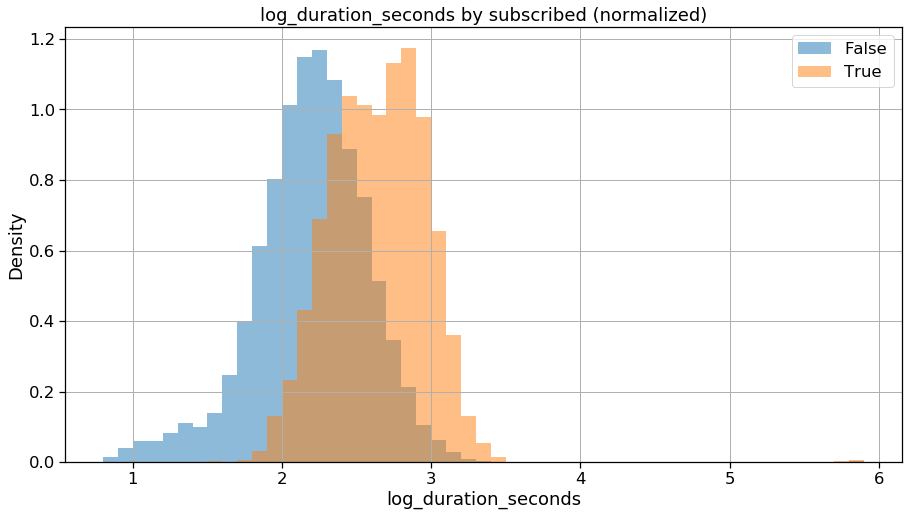

In [15]:
df['log_duration_seconds'] = np.log10(df['duration_seconds'])

min_log_duration_seconds = 0.8
max_log_duration_seconds = 6
print(f'min = {10**min_log_duration_seconds:.1f}s')
print(f'max = {10**max_log_duration_seconds:.0f}s')

multiple_histograms_plot(df, x='log_duration_seconds', hue='subscribed',
                         bins=np.arange(min_log_duration_seconds, 
                                        max_log_duration_seconds, 
                                        0.1), 
                         density=True)

### emp.var.rate

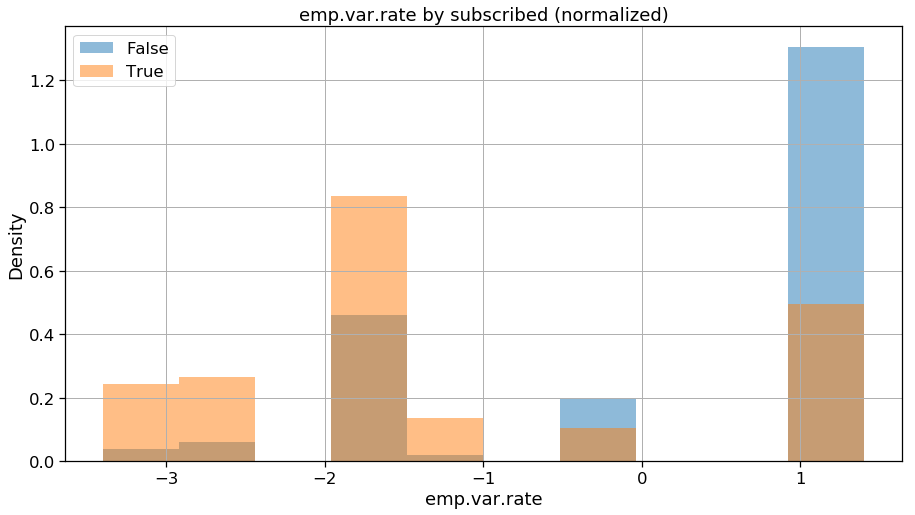

In [16]:
multiple_histograms_plot(df, x='emp.var.rate', hue='subscribed', density=True)

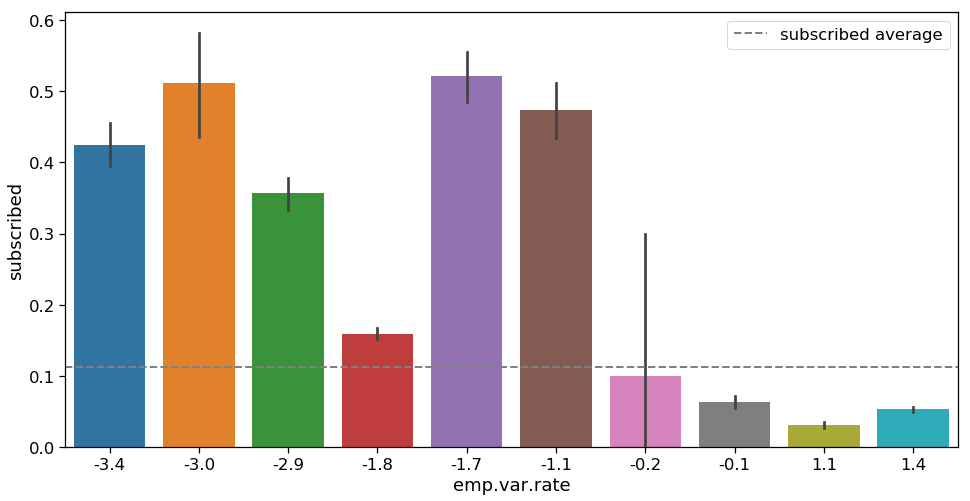

In [17]:
bar_plot_with_categorical(df, 'emp.var.rate', hue='subscribed',
                          order=np.sort(df['emp.var.rate'].unique()))

### month

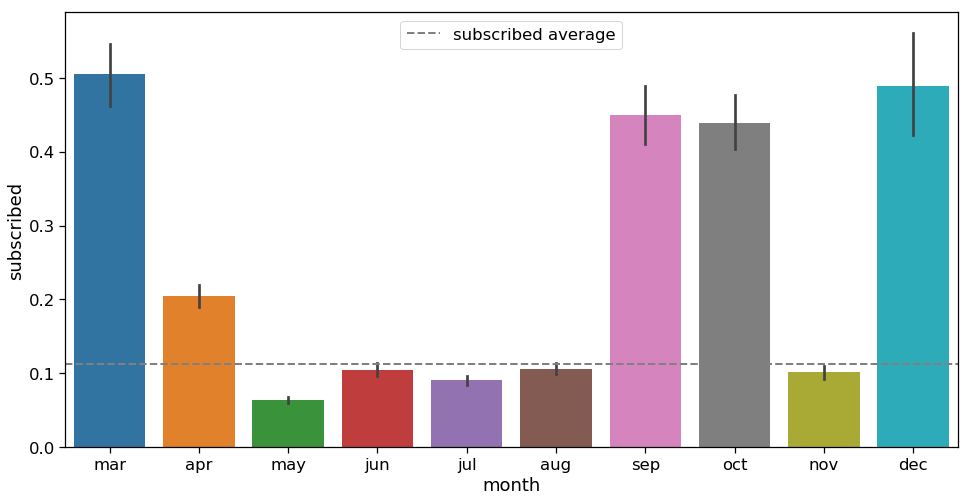

In [18]:
bar_plot_with_categorical(df, 'month', hue='subscribed',
                          order=['mar', 'apr', 'may', 'jun', 'jul', 
                                 'aug', 'sep', 'oct', 'nov', 'dec'])

### nr.employed

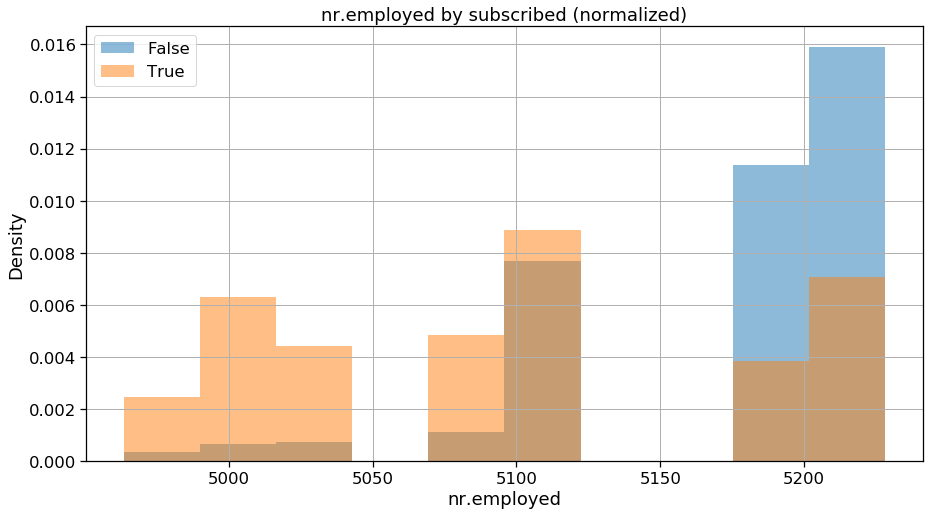

In [19]:
multiple_histograms_plot(df, x='nr.employed', hue='subscribed', density=True)

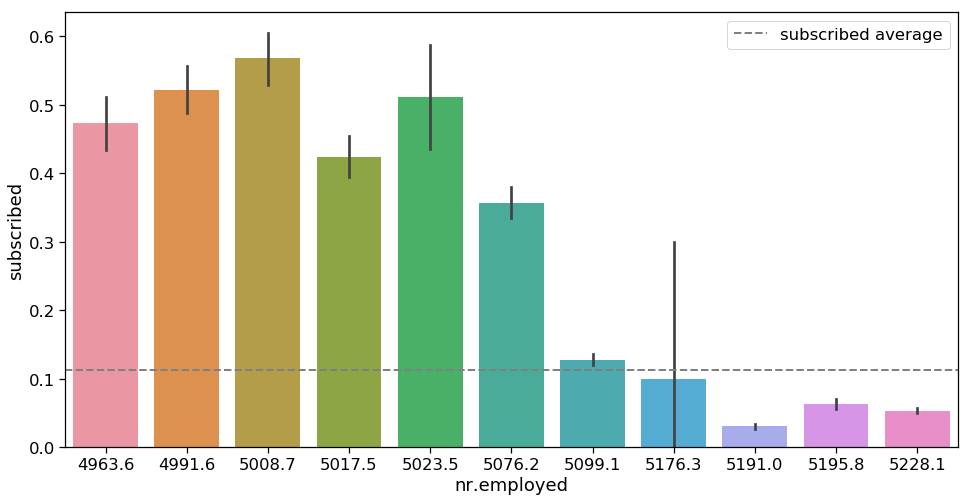

In [20]:
bar_plot_with_categorical(df, 'nr.employed', hue='subscribed',
                          figsize=(16, 8), order=np.sort(df['nr.employed'].unique()))

### euribor3m

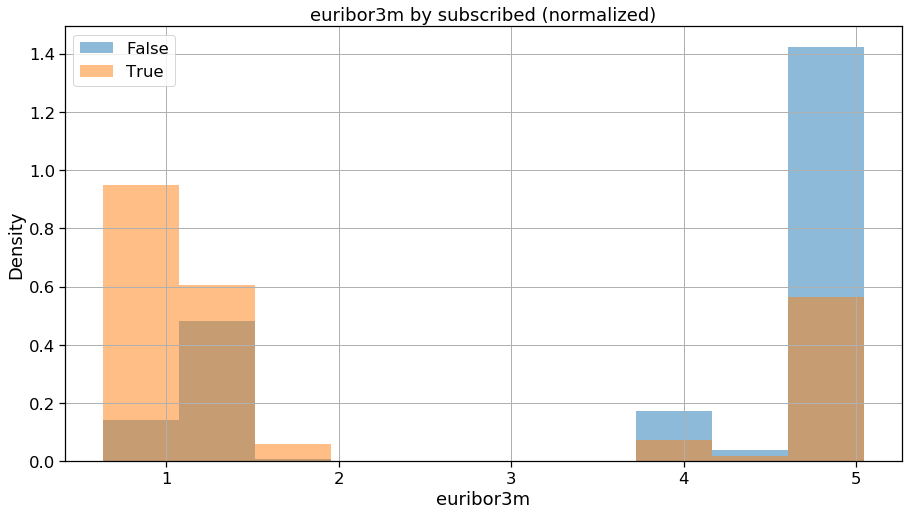

In [21]:
multiple_histograms_plot(df, x='euribor3m', hue='subscribed', density=True)

### contact

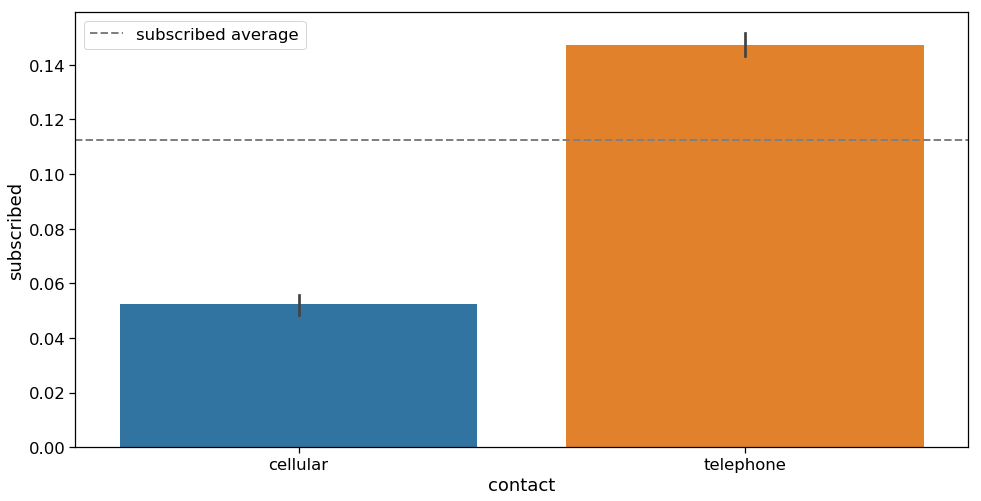

In [22]:
bar_plot_with_categorical(df, 'contact', hue='subscribed',
                          order=[1, 2], xticklabels=['cellular', 'telephone'])

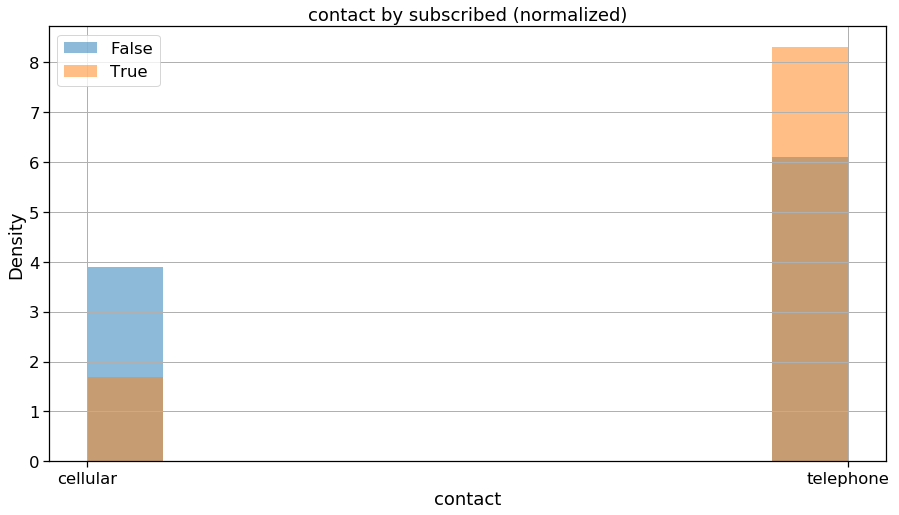

In [23]:
multiple_histograms_plot(df, x='contact', hue='subscribed',
                         xticks=[1, 2], xticklabels=['cellular', 'telephone'], 
                         density=True)

### loan

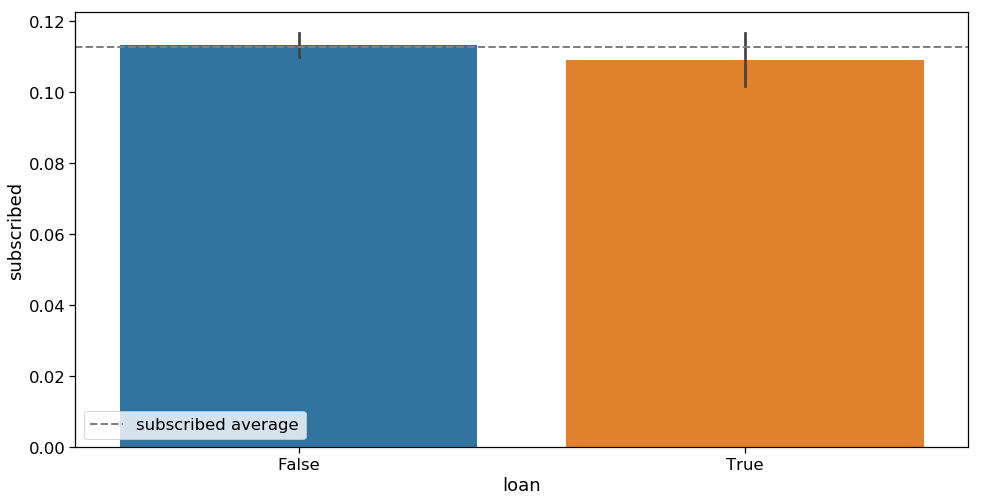

In [24]:
bar_plot_with_categorical(df, 'loan', hue='subscribed',
                          xticklabels=['False', 'True'])

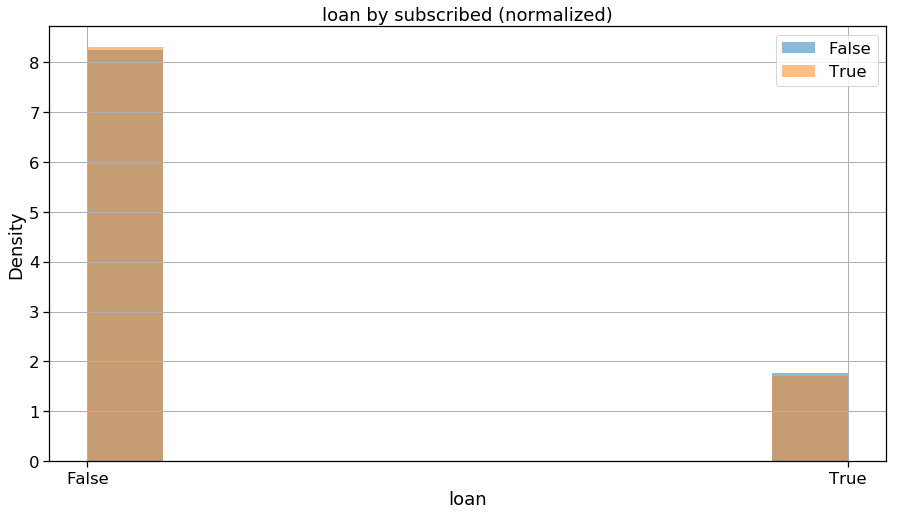

In [25]:
multiple_histograms_plot(df, x='loan', hue='subscribed',
                         xticks=[0, 1], xticklabels=['False', 'True'],
                         density=True)

### Correlations

In [26]:
df['month'] = df['month'].astype('category')
df['month'].cat.reorder_categories(['mar', 'apr', 'may', 'jun', 'jul', 
                                    'aug', 'sep', 'oct', 'nov', 'dec'],
                                   ordered=True, inplace=True)

month_codes = df['month'].cat.codes
df['month'].dtype

CategoricalDtype(categories=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
                  'nov', 'dec'],
                 ordered=True)

In [27]:
duration_seconds_pearson, _ = pearsonr(df['duration_seconds'], df['subscribed'])
log_duration_seconds_pearson, _ = pearsonr(df['log_duration_seconds'], df['subscribed'])
emp_var_rate_pearson, _ = pearsonr(df['emp.var.rate'], df['subscribed'])
nr_employed_pearson, _ = pearsonr(df['nr.employed'], df['subscribed'])
euribor3m_pearson, _ = pearsonr(df['euribor3m'], df['subscribed'])
month_pearson = np.nan
contact_pearson, _ = pearsonr(df['contact'], df['subscribed'])
loan_pearson, _ = pearsonr(df['loan'], df['subscribed'])

In [28]:
pd.DataFrame(data=[[duration_seconds_pearson],
                   [log_duration_seconds_pearson],
                   [emp_var_rate_pearson],
                   [nr_employed_pearson],
                   [euribor3m_pearson],
                   [month_pearson],
                   [contact_pearson],
                   [loan_pearson]],
             columns=['pearson'],
             index=['duration_seconds', 'log_duration_seconds', 'emp.var.rate', 
                    'nr.employed', 'euribor3m', 'month', 'contact', 'loan'])

,pearson
duration_seconds,0.024550
log_duration_seconds,0.347003
emp.var.rate,-0.298359
nr.employed,-0.354698
euribor3m,-0.307799
month,NaN
contact,0.144788
loan,-0.005139
